# Clustering with Sklearn

In this notebook we'll practice clustering algorithms with Scikit-Learn.

## Data sets

We'll use the following datasets:
* Some sample data
* [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
* [Old Faithful eruption data](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat): eruption times and wait times between eruptions

There are many [clustering data sets](https://archive.ics.uci.edu/ml/datasets.html?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) you can use for practice!


In [1]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

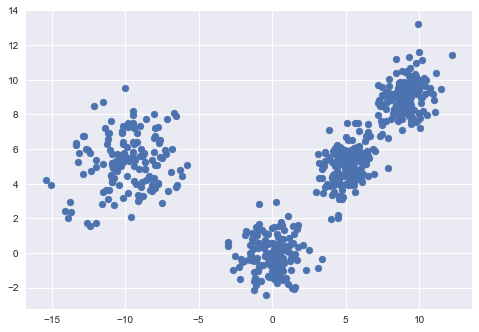

In [2]:
## Create some synthetic data
## generating 4 normal distributions around 4 means

from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[5,5], cov=[[1,0.5],[0.2,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[9,9], cov=[[1,0.5],[0.2,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[-10,5], cov=[[3,0.5],[0.2,2]])
for i in range(150):
    data.append(dist.rvs())    
    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

In [3]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `color` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='b')
df_circ = pd.concat([df1, df2])

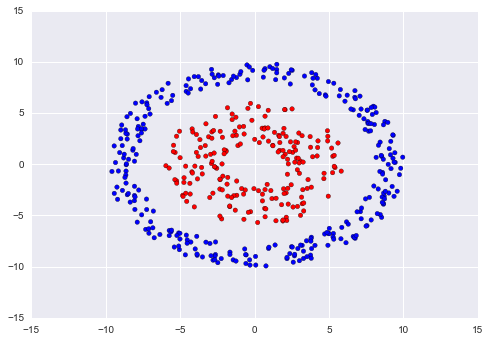

In [4]:
## put points around circumference of circle

plt.scatter(df_circ['x'], df_circ['y'], c=df_circ['color'])
plt.show()

## K-Means with sklearn

In [9]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print labels


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

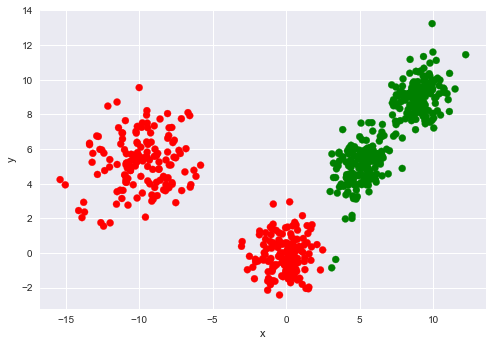

In [10]:
# Plot the data and assign colors to each one

def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try it with `k=4` this time.

Counter({3: 153, 1: 150, 2: 150, 0: 147})


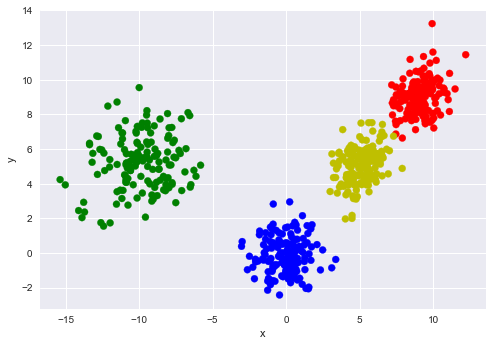

In [11]:
estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## look at the counter numbers below. basically the data set we made had 150 data points in each distribution.
## numbers below show that only 3 variables have been misclassified, which is pretty good

Let's try the circular data.

Counter({0: 258, 1: 242})


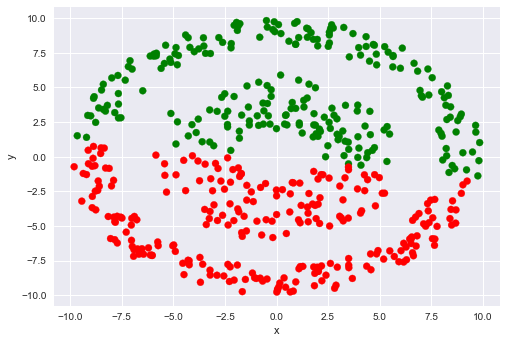

In [12]:
estimator = KMeans(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## less successful with this data set. instead of 

Ouch! No so great on this dataset. Now let's try some real data.

In [14]:
of_df = pd.read_csv("./datasets/old-faithful.csv")
of_df.head()

,eruption_time,wait_time
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


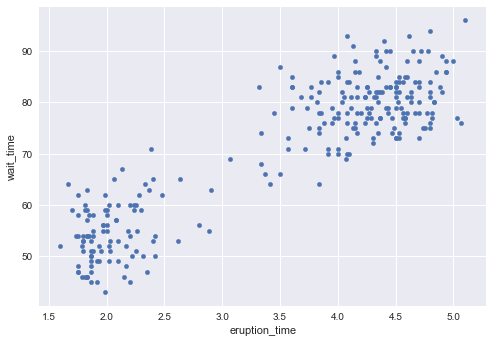

In [15]:
## start by plotting the data to see if you can ID clusters

of_df.plot.scatter(x="eruption_time", y="wait_time")
plt.show()

In [16]:
# Fit a k-means estimator, in this case we use 2 clusters
estimator = KMeans(n_clusters=2)
X = of_df[["eruption_time", "wait_time"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

Counter({1: 172, 0: 100})


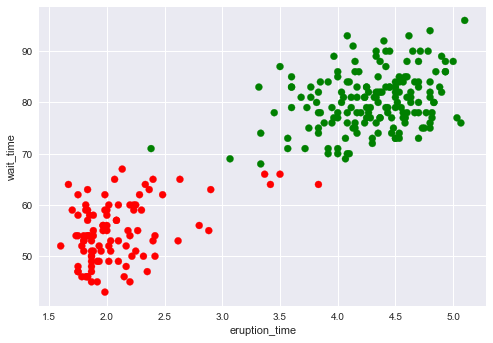

In [18]:
# Plot the data

colors = set_colors(labels)
plt.scatter(of_df["eruption_time"], of_df["wait_time"], c=colors)
plt.xlabel("eruption_time")
plt.ylabel("wait_time")
plt.show()

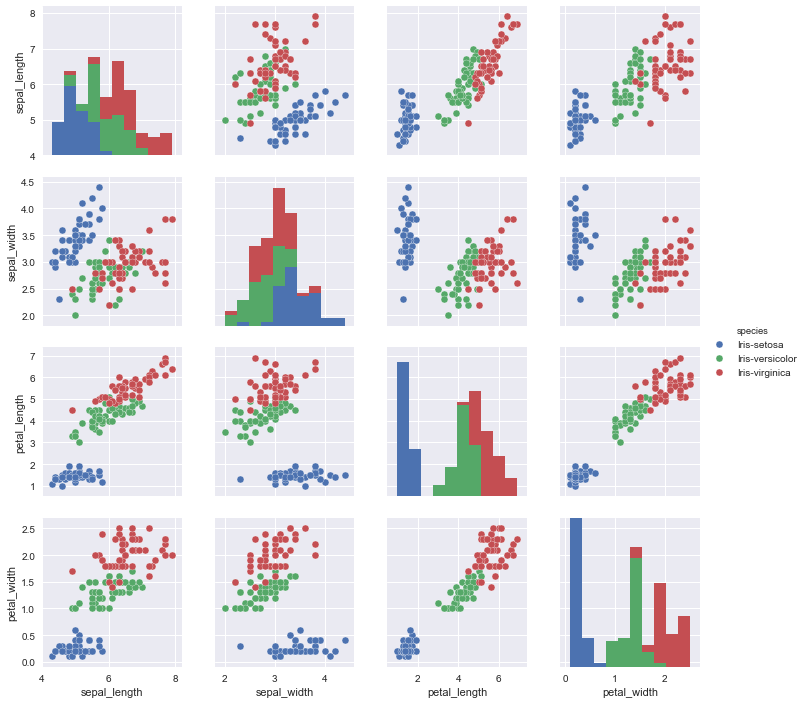

In [46]:
iris = pd.read_csv("./datasets/iris.data")
sns.pairplot(iris, hue="species")
plt.show()

Counter({0: 96, 1: 54})


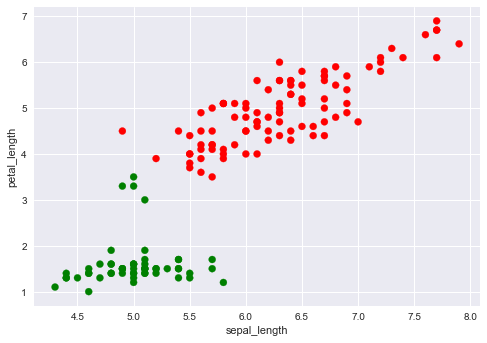

In [43]:
## Exercise Answers here

## 1.A - sepal_length vs petal_length where k is 2

estimator = KMeans(n_clusters=2)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)

labels = estimator.labels_
print Counter(labels)


## Plot the data

colors = set_colors(labels)
plt.scatter(iris["sepal_length"], iris["petal_length"], c=colors)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()



Counter({2: 58, 1: 51, 0: 41})


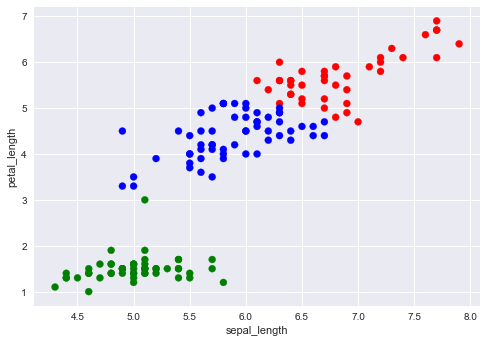

In [33]:
## 1.B - sepal_length vs petal_length where k is 3

estimator = KMeans(n_clusters=3)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)

labels = estimator.labels_
print Counter(labels)

# Plot the data

colors = set_colors(labels)
plt.scatter(iris["sepal_length"], iris["petal_length"], c=colors)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()


Counter({0: 100, 1: 50})


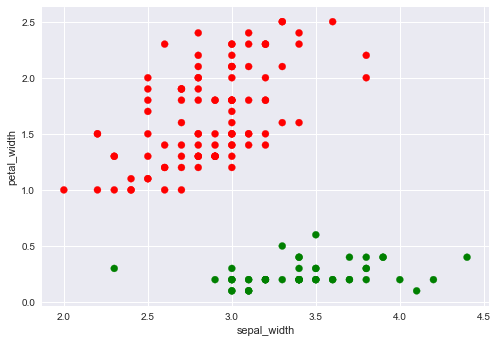

In [30]:
## 2.A - sepal_width vs petal_width where k is 2

estimator = KMeans(n_clusters=2)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)

labels = estimator.labels_
print Counter(labels)

# Plot the data

colors = set_colors(labels)
plt.scatter(iris["sepal_width"], iris["petal_width"], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()



Counter({1: 53, 0: 49, 2: 48})


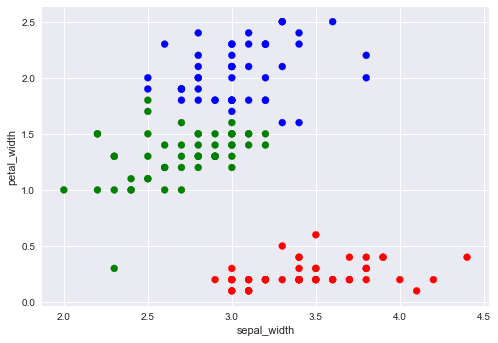

In [41]:
## 2.B - sepal_width vs petal_width where k is 3

estimator = KMeans(n_clusters=3)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)

labels = estimator.labels_
print Counter(labels)

# Plot the data

colors = set_colors(labels)
plt.scatter(iris["sepal_width"], iris["petal_width"], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()


Counter({1: 58, 0: 51, 2: 41})


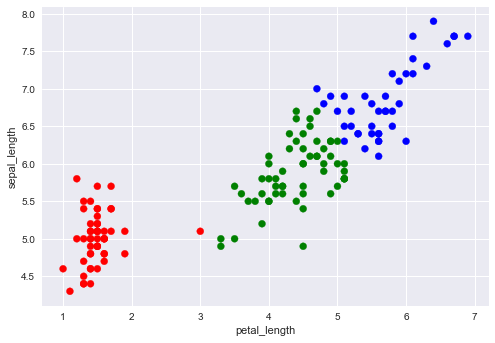

0.253333333333


In [39]:
## USE THIS CODE WHEN DOING K-MEANS CLUSTERING!!!

estimator = KMeans(n_clusters=3)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

label_map = {"Iris-setosa": 1, "Iris-versicolor": 0, "Iris-virginica": 2}
true_labels = []
for row in iris.itertuples():
    true_labels.append(label_map[row.species])
number_correct = 0
for t, l in zip(true_labels, labels):
    if t == l:
        number_correct += 1
print number_correct / float(len(iris))

## 0.88 means that the model is 88% accurate

## DBSCAN

Counter({1: 297, 0: 148, 2: 136, -1: 19})


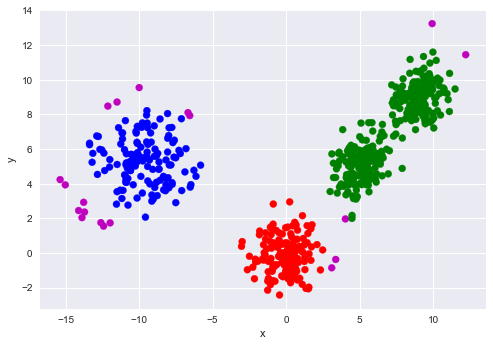

In [55]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1.2, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 143, 2: 140, 0: 138, -1: 90, 3: 89})


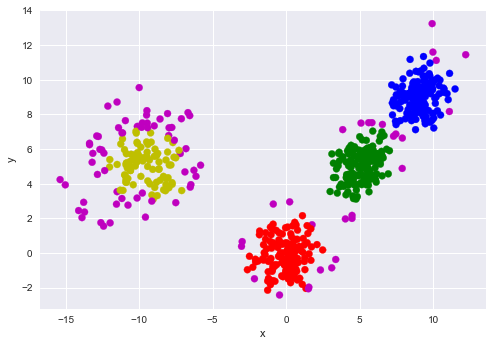

In [53]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 300, 0: 200})


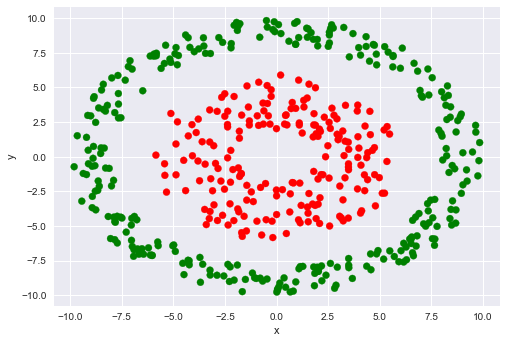

In [56]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Much better than k-means on this dataset! Let's try to cook up something that DBSCAN doesn't work as well on.

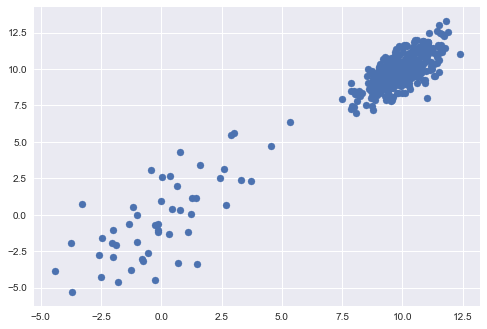

In [59]:
## Create some synthetic data

data = []
dist = multivariate_normal(mean=[0,0], cov=[[6,12],[1,6]])
for i in range(50):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[10,10], cov=[[1,1.1],[0.2,0.6]])
for i in range(400):
    data.append(dist.rvs())    
    
df2 = pd.DataFrame(data, columns=["x", "y"])
df2.head()
plt.scatter(df2['x'], df2['y'])
plt.show()

Counter({0: 380, -1: 70})


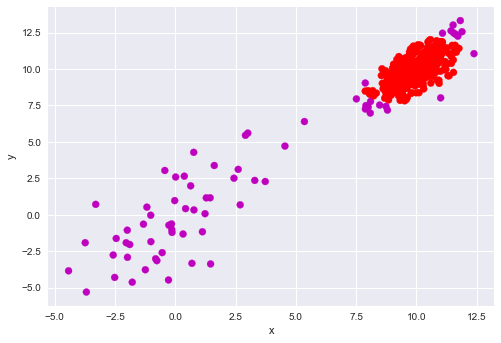

In [60]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.5, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise: DBSCAN

For the Iris dataset, fit and plot dbscan models to:
* sepal_length and petal_length
* sepal_width and petal_width

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

## Hierarchical Clustering

Counter({1: 161, 0: 150, 2: 150, 3: 139})


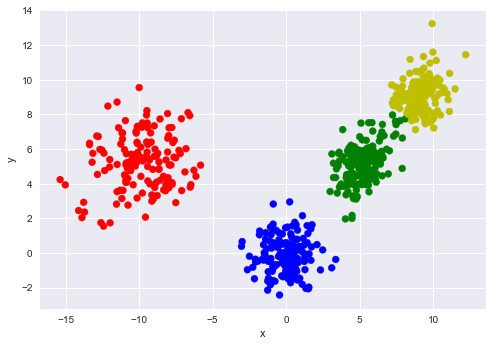

In [36]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({0: 271, 1: 229})


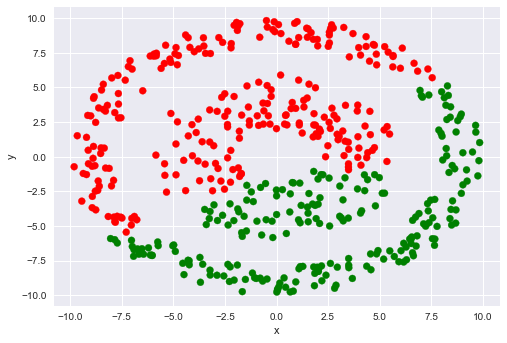

In [57]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [22]:
## Silhouette Coefficient

from sklearn import metrics

estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

print metrics.silhouette_score(X, labels, metric='euclidean')


Counter({3: 152, 0: 150, 2: 150, 1: 148})
0.707565789149


In [23]:
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)
print metrics.silhouette_score(X, labels, metric='euclidean')

Counter({2: 145, 1: 143, 0: 142, 3: 109, -1: 61})
0.577093605577


Bigger is better, so k-means was a better clustering algorithm on this data set.